In [ ]:
# 12월 6일
# commit한 사람 : 오주영
# position과 value에 대해서 Regression 모델 만드는 중 아직 제작완료 X


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.read_csv("FIFA_train.csv")
df_test = pd.read_csv("FIFA_test.csv")

# 데이터 합치기
df = pd.concat([df_train, df_test], ignore_index=True)

In [57]:
plt.rcParams['font.family'] = 'NanumGothic'
df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12755,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0,NaN
12756,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0,NaN
12757,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0,NaN
12758,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0,NaN


In [58]:
print(df["position"].head(20))
print(df["position"].value_counts())

0     ST
1     GK
2     ST
3     DF
4     GK
5     DF
6     MF
7     MF
8     GK
9     GK
10    MF
11    ST
12    GK
13    DF
14    MF
15    MF
16    ST
17    ST
18    ST
19    MF
Name: position, dtype: object
position
MF    4859
DF    4061
ST    2422
GK    1418
Name: count, dtype: int64


In [59]:
# position과 value 칼럼의 결측값 확인
print(df[['position', 'value']].isnull().sum())

# 결측값 처리 (예: 결측값을 포함하는 행 삭제)
df = df.dropna(subset=['position', 'value'])


position       0
value       3828
dtype: int64


In [60]:
# value 칼럼에서 결측값이 있는 행 삭제
df = df.dropna(subset=['value'])

# 결측값 처리 후 상태 확인
print(df[['position', 'value']].isnull().sum())


position    0
value       0
dtype: int64


In [61]:
import pandas as pd

# 'position' 컬럼을 원-핫 인코딩으로 변환
df_encoded = pd.get_dummies(df['position'], prefix='position')

# 원본 데이터프레임에 추가
df = pd.concat([df, df_encoded], axis=1)

df

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,position_DF,position_GK,position_MF,position_ST
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,False,False,False,True
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,False,True,False,False
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,False,False,False,True
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,True,False,False,False
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0,False,False,True,False
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0,True,False,False,False
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0,True,False,False,False
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0,False,True,False,False


c:\Users\ohjuy\anaconda3\envs\sda2024\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


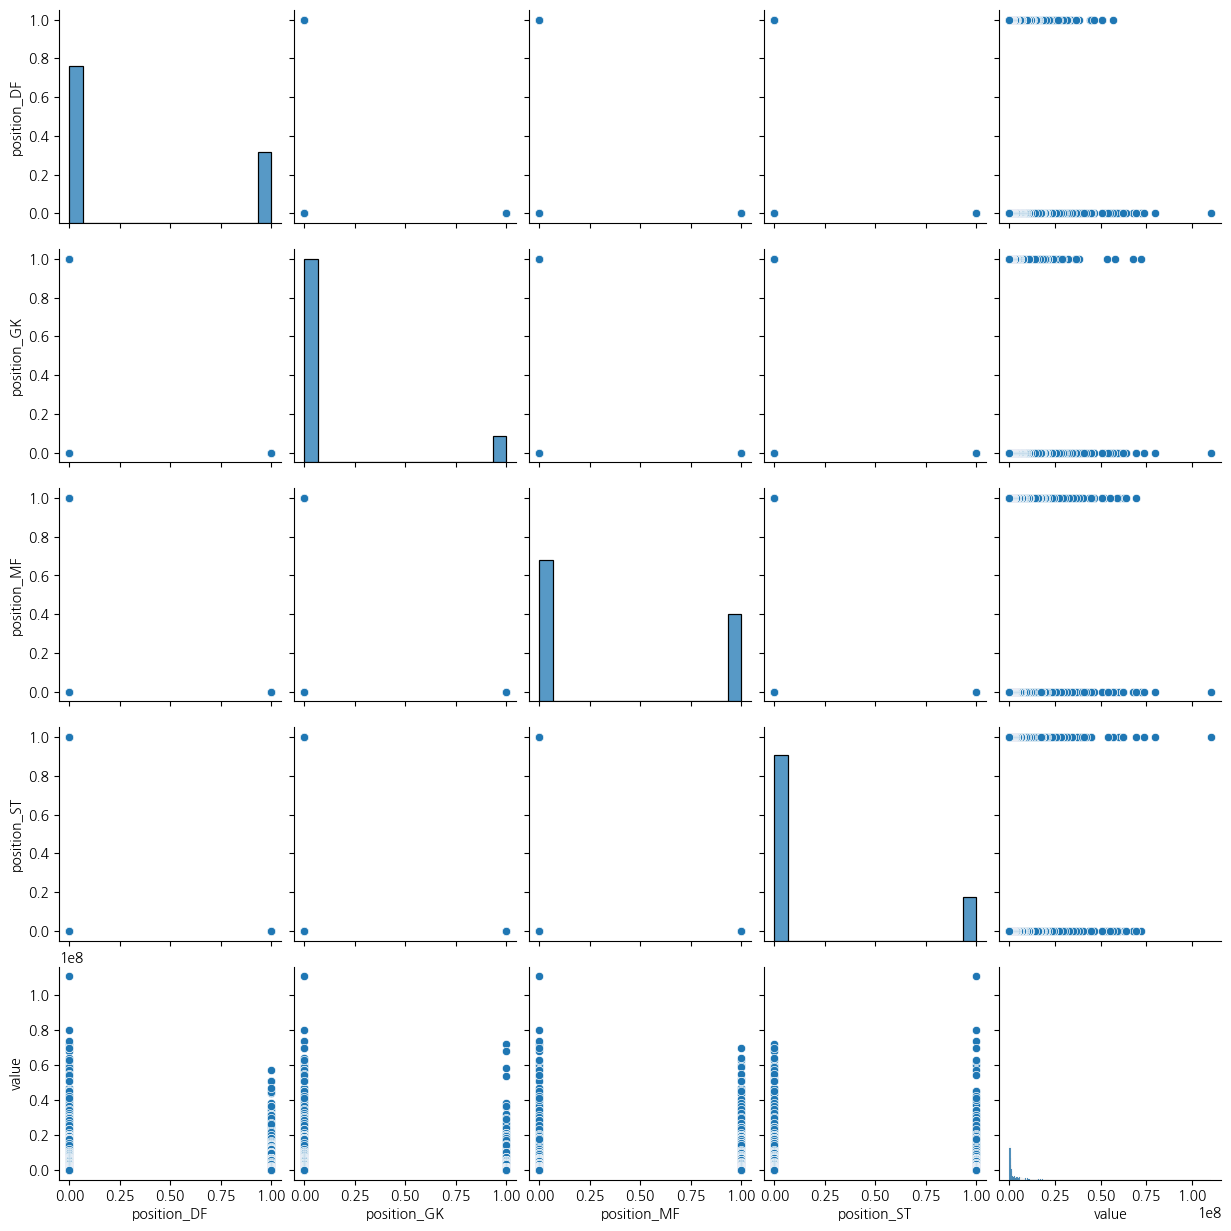

In [62]:
# position_DF, position_GK, position_MF, position_ST 모두 포함하여 회귀 모델링
sns.pairplot(df[['position_DF', 'position_GK', 'position_MF', 'position_ST', 'value']])
plt.show()


In [ ]:
# . 대각선의 히스토그램에서 직선 방향 (y축 방향):
# 대각선에는 각 변수의 분포를 나타내는 히스토그램이나 커널 밀도 추정(KDE)이 표시됩니다.
# 만약 y축 방향으로 직선이 보인다면, 이는 해당 변수의 분포가 한쪽 방향으로 집중되어 있다는 뜻일 수 있습니다. 예를 들어, 값이 한 범위에 몰려 있는 경우에는 y축에서 직선 모양을 볼 수 있습니다.
# 예를 들어, 특정 변수의 값들이 대부분 특정 구간에 집중되어 있고 극단적인 값들이 적다면, 그 분포는 직선처럼 보일 수 있습니다.
# 2. 산점도에서 직선 방향 (x축 방향):
# pairplot에서 각 변수 간의 산점도는 변수들 간의 관계를 나타냅니다.
# x축 방향으로 직선이 보인다면, 이는 두 변수 간에 선형 관계가 있음을 나타냅니다. 즉, 한 변수의 값이 증가할 때, 다른 변수도 일정하게 증가하거나 감소하는 관계가 있다는 의미입니다.
# 예를 들어, position_DF와 value 사이에 선형 관계가 있다면, 산점도에서 x축 방향으로 직선처럼 보일 수 있습니다.
# 이는 두 변수 간에 강한 양의 선형 관계나 음의 선형 관계가 있을 때 발생할 수 있습니다.
# 결론:
# 대각선에서 직선 (y축 방향): 각 변수의 분포가 한 방향에 몰려 있거나 고르게 분포하지 않은 경우 나타날 수 있습니다.
# 산점도에서 직선 (x축 방향): 두 변수 간에 선형적인 관계가 있다는 것을 시각적으로 나타냅니다.

c:\Users\ohjuy\anaconda3\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


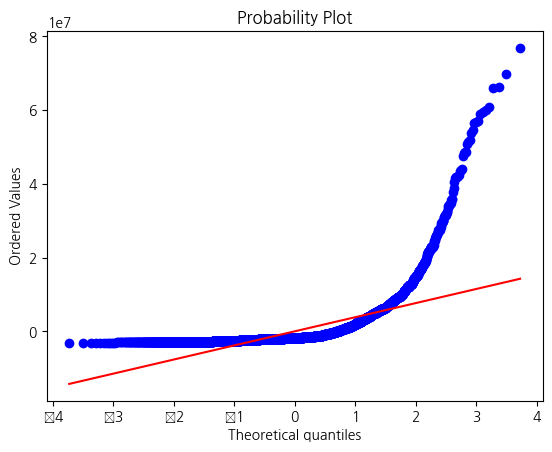

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 독립 변수 (원-핫 인코딩된 포지션들)과 종속 변수 (예: value)
X = df[['position_DF', 'position_GK', 'position_MF', 'position_ST']]  # 원-핫 인코딩된 변수들
y = df['value']  # 종속 변수

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 잔차 계산
residuals = y_train - model.predict(X_train)

# Q-Q plot으로 정규성 검사
import matplotlib.pyplot as plt
from scipy import stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


c:\Users\ohjuy\anaconda3\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


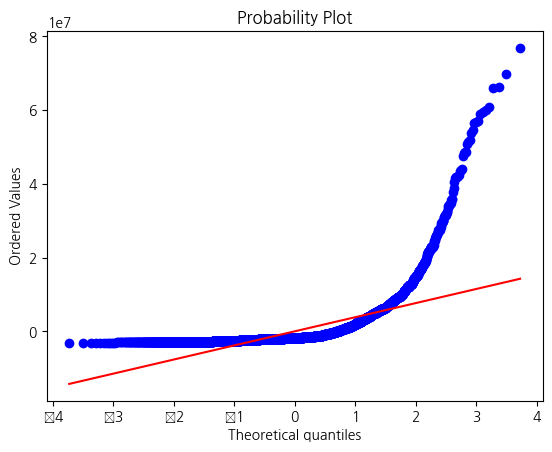

In [64]:
# 잔차 계산 (position_DF 등 포함한 모델 학습 후)
residuals = y_train - model.predict(X_train)

# Q-Q plot으로 정규성 검사
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


In [65]:
from statsmodels.stats.stattools import durbin_watson
# Durbin-Watson 통계량 계산
dw_stat = durbin_watson(residuals)
print("Durbin-Watson 통계량:", dw_stat)


Durbin-Watson 통계량: 2.037813748138769


In [ ]:
# 잔차 간에 패턴이나 상관관계가 없다는 것을 의미합니다.

# 따라서, 자기상관이 없는 잔차를 확인할 수 있으며, 이는 선형 회귀 모델이 잘 작동하고 있다는 좋은 신호입니다. 
# 이 후 모델을 평가하거나 예측을 진행할 수 있습니다.

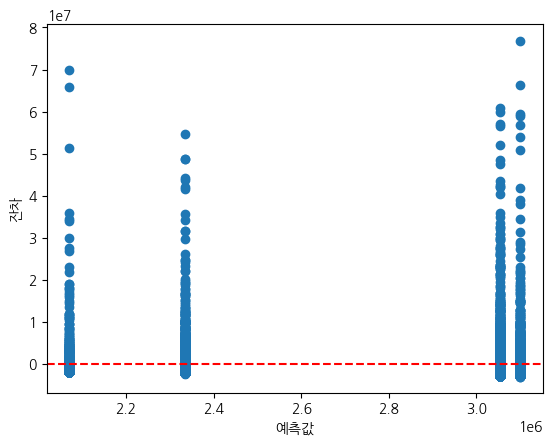

In [66]:
# 잔차의 산점도
plt.scatter(model.predict(X_train), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.show()


In [74]:
print(X_train.dtypes)
print(y_train.dtypes)

position_DF    bool
position_GK    bool
position_MF    bool
position_ST    bool
dtype: object
float64


In [75]:
# bool 타입의 컬럼을 float64로 변환
X_train = X_train.astype(float)

# 상수항 추가
import statsmodels.api as sm
X_with_const = sm.add_constant(X_train)

# OLS 모델 학습
model_sm = sm.OLS(y_train, X_with_const).fit()

# Cook's Distance 계산
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(model_sm)
cooks_d = influence.cooks_distance[0]

# Cook's Distance 출력
print(cooks_d)


1470    0.000068
5980    0.000009
6955    0.000014
3994    0.000012
8474    0.000041
          ...   
5734    0.000011
5191    0.000011
5390    0.000007
860     0.000009
7270    0.000036
Length: 7145, dtype: float64


In [76]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# statsmodels에서 OLS 모델을 학습
X_with_const = sm.add_constant(X_train)  # 상수항 추가
model_sm = sm.OLS(y_train, X_with_const).fit()

# OLSInfluence로 Cook's Distance 계산
influence = OLSInfluence(model_sm)
cooks_d = influence.cooks_distance[0]

# Cook's Distance 값 출력
print(cooks_d)


1470    0.000068
5980    0.000009
6955    0.000014
3994    0.000012
8474    0.000041
          ...   
5734    0.000011
5191    0.000011
5390    0.000007
860     0.000009
7270    0.000036
Length: 7145, dtype: float64


In [78]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# statsmodels에서 OLS 모델을 학습
X_with_const = sm.add_constant(X_train)  # 상수항 추가
model_sm = sm.OLS(y_train, X_with_const).fit()

# OLSInfluence로 Cook's Distance 계산
influence = OLSInfluence(model_sm)
cooks_d = influence.cooks_distance[0]

# Cook's Distance 값이 0.5 이상인 포인트 찾기
influential_points = [i for i, dist in enumerate(cooks_d) if dist >= 0.5]

# 영향력 있는 점 출력
print(f"Cook's Distance 값이 0.5 이상인 데이터 포인트 인덱스: {influential_points}")


Cook's Distance 값이 0.5 이상인 데이터 포인트 인덱스: []


In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 상수항을 포함한 X 변수
X_with_const = sm.add_constant(X_train)

# 각 변수에 대한 VIF 계산
vif = pd.DataFrame()
vif['Variable'] = X_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

# VIF 값 출력
print(vif)


      Variable  VIF
0        const  0.0
1  position_DF  inf
2  position_GK  inf
3  position_MF  inf
4  position_ST  inf


c:\Users\ohjuy\anaconda3\envs\sda2024\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\ohjuy\anaconda3\envs\sda2024\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [80]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # 2차 다항식
X_poly = poly.fit_transform(X_train)

model_poly = LinearRegression()
model_poly.fit(X_poly, y_train)


LinearRegression()

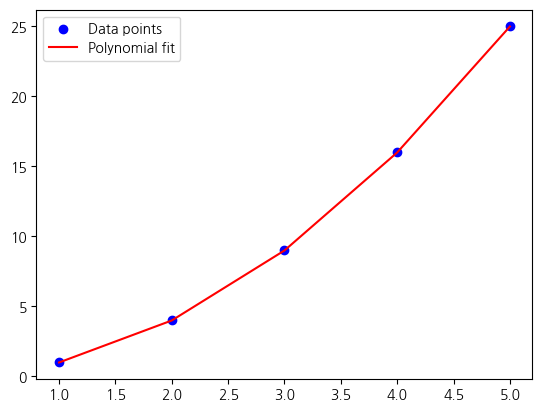

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

# 예시 데이터
X = np.array([[1], [2], [3], [4], [5]])  # 독립 변수
y = np.array([1, 4, 9, 16, 25])  # 종속 변수 (y = x^2)

# 다항식 변환 (2차 다항식)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_poly, y)

# 예측
y_pred = model.predict(X_poly)

# 시각화
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Polynomial fit')
plt.legend()
plt.show()


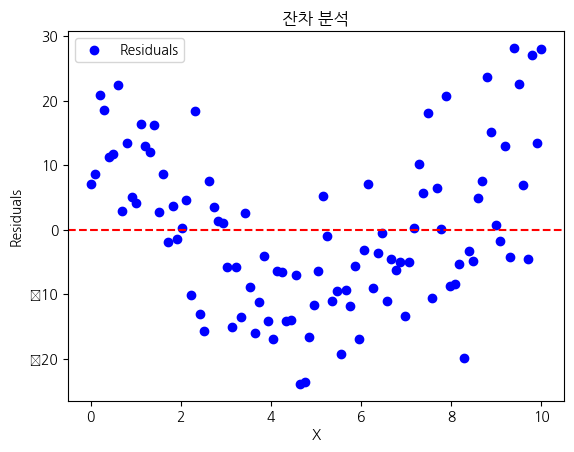

In [88]:
# 잔차 분석
y_residual = y - y_poly_pred  # 실제 값과 예측 값의 차이

# 잔차 그래프
plt.scatter(X, y_residual, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('잔차 분석')
plt.legend()
plt.show()
